In [6]:
import numpy as np
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import os
import cv2
import seaborn as sns
import torch
import torch.nn.functional as F
import math
import torchvision.transforms as transform
import numpy as np
import matplotlib.image as mpimg

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
path = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\AUTOENCONDER\dataset'

In [4]:
path_val  = path + '\\' + 'val\\'
path_train = path + '\\' +'train\\'
path_raw  = path + '\\'+ 'RawData\\'

In [7]:
img_val = torchvision.datasets.ImageFolder(root=path_val, transform = transform.ToTensor())
img_train = torchvision.datasets.ImageFolder(root=path_train, transform = transform.ToTensor())

In [9]:
import torch.utils.data as data_utils

# indices = torch.arange(0,170)
# img_val_high = data_utils.Subset(img_val, indices)
# indices = torch.arange(170,340)
# img_val_low = data_utils.Subset(img_val, indices)

indices = torch.arange(0,685)
img_train_high = data_utils.Subset(img_train, indices)
indices = torch.arange(685,1370)
img_train_low = data_utils.Subset(img_train, indices)

In [10]:
import random
cantidad = 170
n_test = int(cantidad*0.30)
test_list1 = random.sample(range(cantidad), n_test)
test_list2 = [x + 170 for x in test_list1]

In [11]:
val_list1=[]
for i in range(cantidad):
    if i not in test_list1:
        val_list1.append(i)
random.shuffle(val_list1)
val_list2 = [x + 170 for x in val_list1]

In [12]:
img_val_high = data_utils.Subset(img_val, val_list1)
img_val_low = data_utils.Subset(img_val, val_list2)

img_test_high = data_utils.Subset(img_val, test_list1)
img_test_low = data_utils.Subset(img_val, test_list2)

In [125]:
path_train_high = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\AUTOENCONDER\dataset\train\high_res'
path_train_low = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\AUTOENCONDER\dataset\train\low_res'
path_val_high = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\AUTOENCONDER\dataset\val\high_res'
path_val_low = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\AUTOENCONDER\dataset\val\low_res'

In [14]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
batch_size = 8

img_transform = transform.Compose([transform.ToTensor(), transform.Normalize((0.5,),(0.5,))]) 

train_set = img_train
test_set = img_val

train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)

train_loader_lowres = torch.utils.data.DataLoader(dataset=img_train_low, batch_size=batch_size, shuffle=False)
train_loader_highres = torch.utils.data.DataLoader(dataset=img_train_high, batch_size=batch_size, shuffle=False)

val_loader_lowres = torch.utils.data.DataLoader(dataset=img_val_low, batch_size=batch_size, shuffle=False)
val_loader_highres = torch.utils.data.DataLoader(dataset=img_val_high, batch_size=batch_size, shuffle=False)

test_loader_lowres = torch.utils.data.DataLoader(dataset=img_test_low, batch_size=batch_size, shuffle=False)
test_loader_highres = torch.utils.data.DataLoader(dataset=img_test_high, batch_size=batch_size, shuffle=False)


cpu


In [15]:
from skimage.io import imread, imshow
def Show_imgs(imgs, name,  size = 4, color = True):
  color_m ='jet'
  if color == False:
    color_m ='gray'
  print('******************' + name  +  '**************************')
  img_numbers = imgs.shape[0]
  rows = cols = math.ceil(np.sqrt(img_numbers))
  
  fig = plt.figure(figsize=(rows*size, cols*size))
  
  for i in range(0, rows*cols):
    fig.add_subplot(rows, cols,i+1)
    if i<img_numbers:
      #plt.imshow(imgs[i].detach(), cmap = 'gray')
      plt.imshow(imgs[i].detach())
      #interpolation=NONE
  plt.show()

******************1**************************


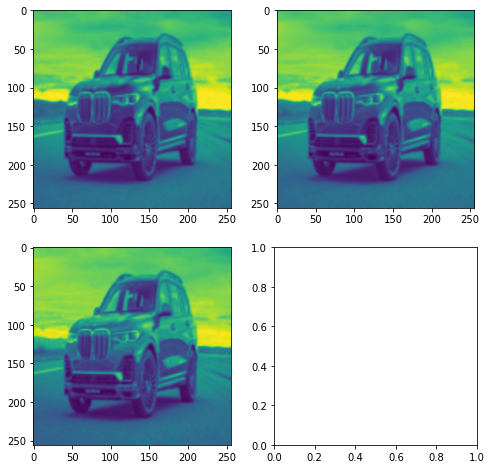

******************0**************************


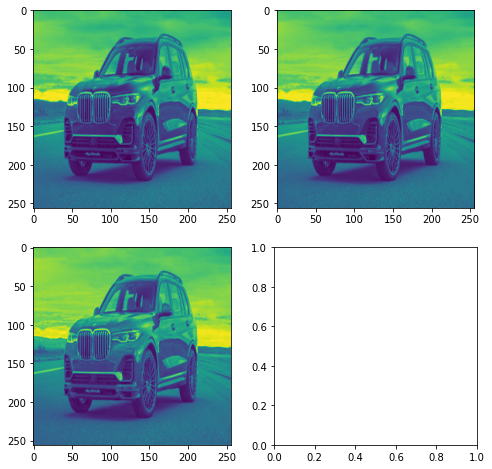

In [16]:
img, label = img_train_low[10]
Show_imgs(img, str(label))
img, label = img_train_high[10]
Show_imgs(img, str(label))

In [126]:
#### Funcion para leer imagenes dentro de una carpeta
width = 256
height = 256
dimension = 4
def imageReading (path):
    folderFilesids = os.listdir(path)
    images = np.zeros((len(folderFilesids), height, width,dimension))
    for count, n in enumerate(folderFilesids):
        path1 = path + '\\' + n
        originalImage = mpimg.imread(path1)
        images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images

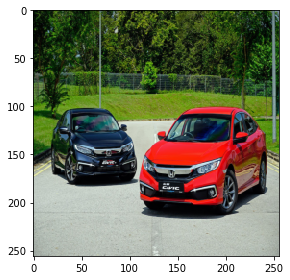

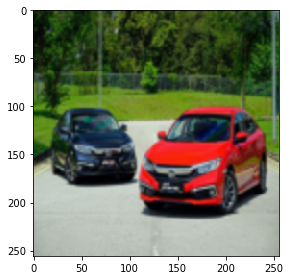

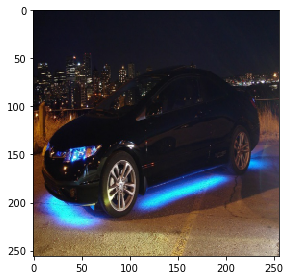

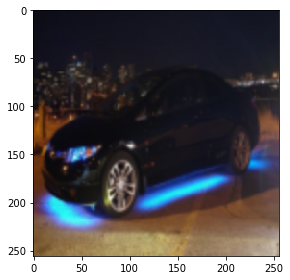

In [127]:
train_high = imageReading (path_train_high)
train_low = imageReading (path_train_low)
val_high = imageReading (path_val_high)
val_low = imageReading (path_val_low)

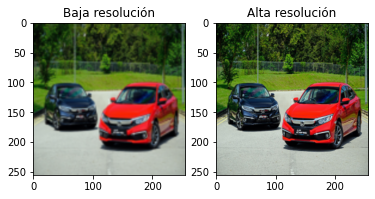

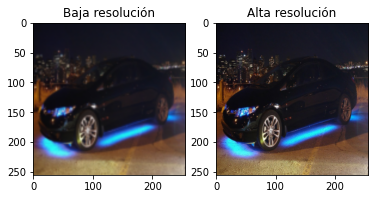

In [128]:
plt.figure(1)
plt.subplot(122)
plt.imshow(np.reshape(train_high[0],(256,256,4))),plt.title('Alta resolución')
plt.subplot(121),plt.imshow(np.reshape(train_low[0],(256,256,4))), plt.title('Baja resolución')
plt.show()
plt.figure(2)
plt.subplot(122)
plt.imshow(np.reshape(val_high[0],(256,256,4))),plt.title('Alta resolución')
plt.subplot(121),plt.imshow(np.reshape(val_low[0],(256,256,4))), plt.title('Baja resolución')
plt.show()


In [9]:
train_high.shape

(685, 256, 256, 4)

In [10]:
train_high = torch.from_numpy(np.array(train_high).reshape(-1,4,256,256)).float() 
train_low = torch.from_numpy(np.array(train_low).reshape(-1,4,256,256)).float()
val_high = torch.from_numpy(np.array(val_high).reshape(-1,4,256,256)).float() 
val_low = torch.from_numpy(np.array(val_low).reshape(-1,4,256,256)).float()

In [161]:
train_high.shape

(685, 256, 256, 4)

In [124]:
img_train = []
for i in range(train_high.shape[0]):
      img_train.append(((train_low[i]/255.0),(train_high[i]/255.0)))
        
img_val = []
for i in range(val_high.shape[0]):
      img_val.append(((((val_low[i]/255.0)-0.5)*2),(((val_high[i]/255.0)-0.5)*2)))

In [122]:
img2 = img_train[0][1]
img2=((img2/2) + 0.5)*255.0

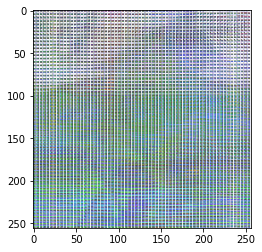

In [123]:
plt.imshow(  img2.permute(1, 2, 0)  )

In [107]:
img_train[20][0].min()

tensor(-1.0000)

In [111]:
img_train[125][0].max()

tensor(-0.9922)

In [113]:
npimg_train[125][0],

torch.Size([4, 256, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


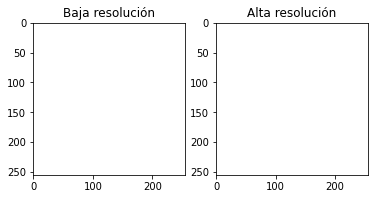

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


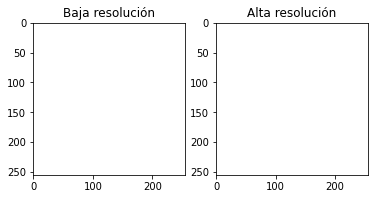

In [104]:
plt.figure(1)
plt.subplot(122)
plt.imshow(np.reshape(img_train[0][0],(256,256,4))),plt.title('Alta resolución')
plt.subplot(121),plt.imshow(np.reshape(img_train[0][1],(256,256,4))), plt.title('Baja resolución')
plt.show()
plt.figure(2)
plt.subplot(122)
plt.imshow(np.reshape(img_val[0][0],(256,256,4))),plt.title('Alta resolución')
plt.subplot(121),plt.imshow(np.reshape(img_val[0][1],(256,256,4))), plt.title('Baja resolución')
plt.show()

In [12]:
img_train[10][1].shape

torch.Size([4, 256, 256])

In [13]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(dataset=img_train, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=img_val, batch_size=batch_size, shuffle=True)


### Modelo

#### Modelo 2

In [ ]:
 ################################FORWARD ENCODER####################################################
class Encoder2(nn.Module):
    def __init__(self):
        super(Encoder2, self).__init__()
        #input 256x256
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=4, out_channels=32, kernel_size=3, stride=1, padding=0), #254
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=0),#252
            nn.ReLU())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) #126
            
        self.MaxPool = nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True) #126
            
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0), #124
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=0), #122
            nn.ReLU())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) #61
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0), #59
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=0), #57
            nn.ReLU())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) # 28
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0), #26
            nn.ReLU())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) # 13
        
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=0), #11
            nn.Tanh())
            
        self.fc = nn.Linear(in_features=512*11*11, out_features=10)
        
        
    def forward(self, image):
        #print("image",image.shape)
            
        out0 = self.layer1(image)
        #print("out",out0.shape)
        out1,indice1 = self.MaxPool(out0)
        #print("out1",out1.shape)
            
        out2 = self.layer2(out1)
        #print("out2",out2.shape)
        out3,indice3 = self.MaxPool(out2)
        #print("out3",out3.shape)
            
        out4 = self.layer3(out3)
        #print("out4",out4.shape)
        out5,indice5 = self.MaxPool(out4)
        #print("out5",out5.shape)
            
        out6 = self.layer4(out5)
        #print("out6",out6.shape)
        out7,indice7 = self.MaxPool(out6)
        #print("out7",out7.shape)    
            
        out8 = self.layer5(out7)            
        #print("out8",out8.shape)
        out9 = out8.view(out8.size(0), -1)
        #print("outflatten1",out9.shape)
        z = self.fc(out9)    
        #print("latente enconder",z.shape)
        return z, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6
    
  ################################FORWARD DECODER####################################################
            
class Decoder2(nn.Module):
    def __init__(self):
        super(Decoder2, self).__init__()
        self.fc    = nn.Linear(in_features=10,out_features=512*11*11)
        #print("lineal1",self.fc.shape)
        self.layer1Deco = nn.Sequential(
            nn.ConvTranspose2d(in_channels=512,out_channels=256, kernel_size=3, stride=1, padding=0),
            nn.ReLU())
        
        self.unpool = nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0)
        
        self.layer2Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), # 13
            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=3, stride=1, padding=0), #27
            nn.ReLU())
        
        self.layer3Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), # 13
            nn.ConvTranspose2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=0), #59
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=0), #57
            nn.ReLU())
        
        self.layer4Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), #6
            nn.ConvTranspose2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=0), #124
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=0), #122
            nn.ReLU())
        
        self.layer5Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), # 13
            nn.ConvTranspose2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=0), #27
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=4, kernel_size=3, stride=1, padding=0), #25
            nn.Tanh())
           
        
    def forward(self, latent, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6):
        #print("latente decoder",latent.shape)
        out = self.fc(latent)
        #print("latente decoder-fc",out.shape)
        out = out.view(out.size(0), 512, 11, 11)
        #print("latente convertida",out.shape)
        out = self.layer1Deco(out)
        #print("layer1Deco",out.shape)
        
        out = self.unpool(out,indice7,output_size=out6.size())
        #print("unpooling",out.shape)
        out = self.layer2Deco(out)
        #print("layer2Deco",out.shape)
        
        out = self.unpool(out,indice5,output_size=out4.size())
        #print("unpooling2",out.shape)
        out = self.layer3Deco(out)
        #print("layer3Deco",out.shape)
        
        out = self.unpool(out,indice3,output_size=out2.size())
        #print("unpooling2",out.shape)
        out = self.layer4Deco(out)
        #print("layer4Deco",out.shape)
        
        out = self.unpool(out,indice1,output_size=out0.size())
        #print("unpooling2",out.shape)
        out = self.layer5Deco(out)
        #print("layer5Deco",out.shape)
        
        return out

In [83]:
 ################################FORWARD ENCODER####################################################
class Encoder2(nn.Module):
    def __init__(self):
        super(Encoder2, self).__init__()
        #input 256x256
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=4, out_channels=32, kernel_size=3, stride=1, padding=0), #254
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=0),#252
            nn.ReLU())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) #126
            
        self.MaxPool = nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True) #126
            
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0), #124
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=0), #122
            nn.ReLU())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) #61
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0), #59
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=0), #57
            nn.ReLU())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) # 28
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0), #26
            nn.ReLU())
            #nn.MaxPool2d(kernel_size=2, stride=2,padding=0, return_indices = True)) # 13
        
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=0), #11
            nn.Tanh())
            
        self.fc = nn.Linear(in_features=512*11*11, out_features=10)
        
        
    def forward(self, image):
        #print("image",image.shape)
            
        out0 = self.layer1(image)
        #print("out",out0.shape)
        out1,indice1 = self.MaxPool(out0)
        #print("out1",out1.shape)
            
        out2 = self.layer2(out1)
        #print("out2",out2.shape)
        out3,indice3 = self.MaxPool(out2)
        #print("out3",out3.shape)
            
        out4 = self.layer3(out3)
        #print("out4",out4.shape)
        out5,indice5 = self.MaxPool(out4)
        #print("out5",out5.shape)
            
        out6 = self.layer4(out5)
        #print("out6",out6.shape)
        out7,indice7 = self.MaxPool(out6)
        #print("out7",out7.shape)    
            
        out8 = self.layer5(out7)            
        #print("out8",out8.shape)
        out9 = out8.view(out8.size(0), -1)
        #print("outflatten1",out9.shape)
        z = self.fc(out9)    
        #print("latente enconder",z.shape)
        return z, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6
    
  ################################FORWARD DECODER####################################################
            
class Decoder2(nn.Module):
    def __init__(self):
        super(Decoder2, self).__init__()
        self.fc    = nn.Linear(in_features=10,out_features=512*11*11)
        #print("lineal1",self.fc.shape)
        self.layer1Deco = nn.Sequential(
            nn.ConvTranspose2d(in_channels=512,out_channels=256, kernel_size=3, stride=1, padding=0),
            nn.ReLU())
        
        self.unpool = nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0)
        
        self.layer2Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), # 13
            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=3, stride=1, padding=0), #27
            nn.ReLU())
        
        self.layer3Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), # 13
            nn.ConvTranspose2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=0), #59
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=0), #57
            nn.ReLU())
        
        self.layer4Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), #6
            nn.ConvTranspose2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=0), #124
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=0), #122
            nn.ReLU())
        
        self.layer5Deco = nn.Sequential(
            #nn.MaxUnpool2d(kernel_size=2, stride=2,padding=0), # 13
            nn.ConvTranspose2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=0), #27
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=4, kernel_size=3, stride=1, padding=0), #25
            nn.Tanh())
           
        
    def forward(self, latent, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6):
        #print("latente decoder",latent.shape)
        out = self.fc(latent)
        #print("latente decoder-fc",out.shape)
        out = out.view(out.size(0), 512, 11, 11)
        #print("latente convertida",out.shape)
        out = self.layer1Deco(out)
        #print("layer1Deco",out.shape)
        
        out = self.unpool(out,indice7,output_size=out6.size())
        #print("unpooling",out.shape)
        out = self.layer2Deco(out)
        #print("layer2Deco",out.shape)
        
        out = self.unpool(out,indice5,output_size=out4.size())
        #print("unpooling2",out.shape)
        out = self.layer3Deco(out)
        #print("layer3Deco",out.shape)
        
        out = self.unpool(out,indice3,output_size=out2.size())
        #print("unpooling2",out.shape)
        out = self.layer4Deco(out)
        #print("layer4Deco",out.shape)
        
        out = self.unpool(out,indice1,output_size=out0.size())
        #print("unpooling2",out.shape)
        out = self.layer5Deco(out)
        #print("layer5Deco",out.shape)
        
        return out

In [84]:
class Autoencoder2(nn.Module):
    def __init__(self):
        super(Autoencoder2, self).__init__()
        self.encoder = Encoder2()
        self.decoder = Decoder2()

    def forward(self, x):
        latent, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6 = self.encoder(x.float())
        x_recon = self.decoder(latent, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6)
        return  x_recon

In [85]:
def train(model, train_loader, Epochs, loss_fn):
    train_loss_avg = []
    for epoch in range(Epochs):
        train_loss_avg.append(0)
        num_batches = 0
        
        
        for image_batch_high,image_batch_low in train_loader:
            image_batch_high = image_batch_high.to(device)
            image_batch_low = image_batch_low.to(device)
            
            #print(image_batch.size())
            #print(image_batch)
            
            image_batch_recon = model(image_batch_high)
            # print(image_batch_recon.size())        
           
            
            loss = loss_fn(image_batch_recon, image_batch_low)
            #print("el loss es :",loss)  
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
          
            train_loss_avg[-1] += loss.item()
            num_batches += 1
          
        train_loss_avg[-1] /= num_batches
        print('Epoch [%d / %d] average reconstruction error: %f' % (epoch+1, Epochs, train_loss_avg[-1]))
        
    return train_loss_avg

In [86]:
%%time   
learning_rate = 0.001
autoencoder = Autoencoder2().float()
autoencoder.to(device)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(params=autoencoder.parameters(), lr=learning_rate, weight_decay=1e-5)

autoencoder.train()


loss_result = train(autoencoder,train_loader,10,loss)

Epoch [1 / 10] average reconstruction error: 0.212473
Epoch [2 / 10] average reconstruction error: 0.005565
Epoch [3 / 10] average reconstruction error: 0.001033
Epoch [4 / 10] average reconstruction error: 0.000623
Epoch [5 / 10] average reconstruction error: 0.000509
Epoch [6 / 10] average reconstruction error: 0.000439
Epoch [7 / 10] average reconstruction error: 0.000390
Epoch [8 / 10] average reconstruction error: 0.000249
Epoch [9 / 10] average reconstruction error: 0.000259
Epoch [10 / 10] average reconstruction error: 0.000243
Wall time: 1h 34min 21s


In [87]:
loss_result

[0.21247291097114251,
 0.005565152893406014,
 0.0010333898095522336,
 0.0006230249114302095,
 0.0005094639944768143,
 0.00043926307752858415,
 0.00039022369784043104,
 0.00024890813666536625,
 0.0002591050220490975,
 0.00024275831149912677]

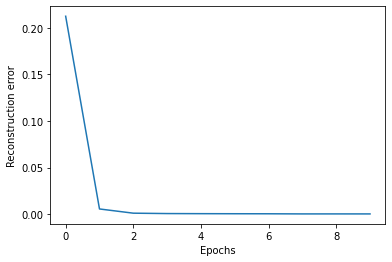

In [88]:
fig = plt.figure()
plt.plot(loss_result)
plt.xlabel('Epochs')
plt.ylabel('Reconstruction error')
plt.show()

In [89]:
def Show(out, title = ''):
    print(title)
    out = out.permute(1,0,2,3)
    grilla = torchvision.utils.make_grid(out,10,5)
    plt.imshow(transforms.ToPILImage()(grilla), 'jet')
    plt.show()

def Show_Weight(out):
    grilla = torchvision.utils.make_grid(out)
    plt.imshow(transforms.ToPILImage()(grilla), 'jet')
    plt.show()

In [164]:
decodificado[0].shape

torch.Size([4, 256, 256])

In [173]:
capacity = 64
latent_dims = 10 
autoencoder.eval()


tensor = torch.zeros(len(val_loader),4)


with torch.no_grad():

    image,label = iter(val_loader).next()
    
    image = image.to(device)
    z, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6 = autoencoder.encoder(image) # Solo decoder para sacar el Z
    #print(z)
    print(z.shape)
    z = z.to('cpu')
    mean = z.mean(dim=0)

    std = (z - mean).pow(2).mean(dim=0).sqrt()

    z1 = torch.randn(16, latent_dims)*std + mean
    z1 = z1.to(device)
    print(z1.shape)
    decodificado = autoencoder.decoder(z1, indice1, indice3, indice5, indice7 ,out0, out2, out4, out6)



    decodificado = decodificado.to('cpu')

    fig, ax = plt.subplots(figsize=(256, 256))
    Show_Weight(decodificado[1:5])
    plt.show()
    fig, ax = plt.subplots(figsize=(256, 256))
    Show_Weight(image[1:5])
    plt.show()
    
    fig, ax = plt.subplots(figsize=(256, 256))
    Show(decodificado[1:5],'generada')
    plt.show()
    fig, ax = plt.subplots(figsize=(256, 256))
    Show(image[1:5],'original')
    plt.show()
    

torch.Size([16, 10])
torch.Size([16, 10])


generada


original


In [168]:
image[0].shape

torch.Size([4, 256, 256])

In [170]:
img_display = image[0].permute(1, 2, 0)  

In [171]:
img_display.to

torch.Size([256, 256, 4])

In [167]:
decodificado.shape

torch.Size([16, 4, 256, 256])

In [138]:
deco1=decodificado[1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
deco1n=scaler.fit(deco1)

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [135]:
def show(img):
    npimg = deco1.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


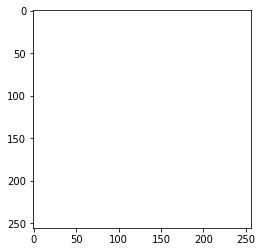

In [136]:
show(deco1)